#Aplicando el modelo de regresión logística y sus respectivas metricas
En este dataset tratare de hacer un buen analisis y tratamiento de los datos para poder obtener un buen resultado usando la regresión logistica y sus respectivas metricas como lo son la matriz de confusion o su curva roc, esto para poner en practica conceptos aprendidos, un buen ejemplo podria ser un dataset de deteccion de fraude a lo cual nos servira para motrar las fortalezas y debilidades del algoritmo

##Importación de las librerias necesarias
Aqui ire importando todas las librerias que requiera a lo largo de este notebook, por el momento estaran las basicas e ire añadiendo más

In [ ]:
!pip install opendatasets
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#Dataset
Para este caso como comente trabajaremos con un datset llamado "Fraudulent Transaction Detection" donde a base de este dataset detectaremos si una transacción es fraudulenta o no, y es uno de los primeros datsets con una buena cantidad de datos.

##Vocabulario del dataset
* TRANSACTION_ID = Unique identifier for the transaction
* TX_DATETIME = Date and time at which the transaction occurs
* CUSTOMER_ID = Unique identifier for the customer
* TERMINAL_ID = Unique identifier for the terminal through which transaction took place
* TX_AMOUNT = Amount of Transaction
* X_TIME_SECONDS = Seconds elapsed before the transaction
* TX_TIME_DAYS = Seconds elapsed before the transaction
* TX_FRAUD = A binary variable, with the value 0 for a legitimate transaction, or the value 1 for a fraudulent transaction.
* TX_FRAUD_SCENARIO = A ternary variable depicting different fraudulent scenarios



In [ ]:
datasetlink = "https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 34.0M/34.0M [00:00<00:00, 38.0MB/s]


In [ ]:
os.chdir("fraud-transaction-detection")
os.listdir()

['Final Transactions.csv']

In [ ]:
#Damos un primer vistazo a los datos
archivo = 'Final Transactions.csv'
df = pd.read_csv(archivo)
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
#dimension del dataset cuenta con 1754155 datos y 10 columnas
df.shape

(1754155, 10)

In [ ]:
#Obtenemos más información acerca de la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [ ]:
df.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [ ]:
#verificamos si tenemos valores nulos
df.isnull().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

## Eliminamos las primeras columnas que son irrelevantes
la primera `Unnamed: 0` esto debido a que esta columna indicaba un indice, lo cual ya tiene por defecto esto lo pudimos evitar declarando bien el dataset sin embargo no nos hace ningun daño eliminar la columna




In [ ]:
#Eliminamos columnas que creo irrelevantes en el analisis
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

In [ ]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


#Analisis exploratorio
Iremos investigando más a profundidad cada uno de los datos que tenemos, esto nos permitira realizar descubrimientos en los datos que nos seran utiles a lo largo del analisis, ya que nos pueden comunicar anomalias que se presenten y poder responder algunas preguntas que nos deja el dataset

#Distribución entre el número total de transacciones
nos da a conocer las transacciones que se han realizado durnate seis meses y nos damos cuenta que hay un número elevado de transacciones fraudulentas los cual buscaremos investigar su causa a lo largo del analisis.

In [ ]:
df['TX_FRAUD'].value_counts()

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64

In [ ]:
colors = ['green' if x == 0 else 'red' for x in [0,1]]

<ipython-input-14-797d87a70dab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=[0,1], y = [1518186, 235969], palette=colors)


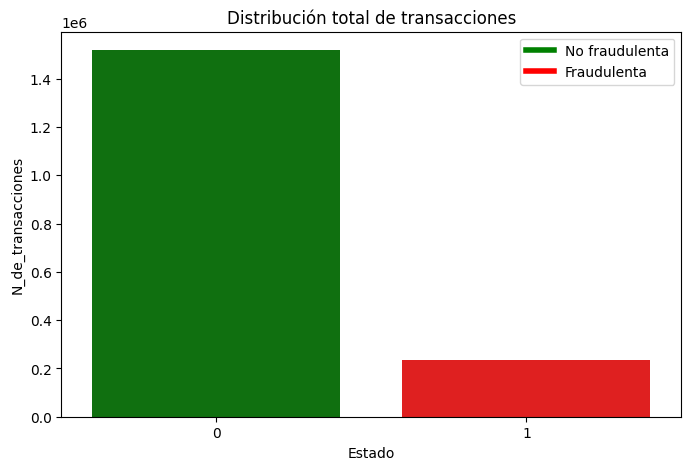

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(x=[0,1], y = [1518186, 235969], palette=colors)
plt.title('Distribución total de transacciones')
custom_legend = [plt.Line2D([0], [0], color=sns.color_palette(colors)[0], lw=4),
                 plt.Line2D([0], [0], color=sns.color_palette(colors)[1], lw=4)]
plt.ylabel('N_de_transacciones')
plt.xlabel('Estado')

# Mostrar la leyenda personalizada
ax1.legend(custom_legend, ['No fraudulenta', 'Fraudulenta'])
plt.show()

###Número de clientes
Pensariamos que en base a la cantidad de transacciones tendriamos una cantidad de clientes bastante elevada tambien, sin embargo descubrimos que no es el caso, ya que en el dataset contamos solo con 4990 clientes lo cual puede ser una mala noticia ya que podriamos tener clientes que tengan muchas transacciones que fueron etiquetadas como fraudulentas o que fueron victimas de algun robo.

In [ ]:
numero_de_clientes = df['CUSTOMER_ID'].nunique()
numero_de_clientes

4990

#Clientes afectados por transaciones fraudulentas
Como comentaba anteriormente lamentablemente tenemos aproximadamente un `85%` de clientes afectado por transacciones fraudulentes lo cual es un panorama bastante desolador, sin em,bargo vamos a tratar de mejorar esto mediante un modelo que logre evitar esto.

In [ ]:
clientes_con_transaciones_fraudulentas = df['CUSTOMER_ID'][df['TX_FRAUD']==1]
clientes_con_transaciones_fraudulentas.nunique()

4258

In [ ]:
clientes_con_transaciones_no_fraudulentas = numero_de_clientes-clientes_con_transaciones_fraudulentas.nunique()
clientes_con_transaciones_no_fraudulentas

732

<ipython-input-18-2fd0c68e83d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[0,1], y=[732,4258], palette=colors)


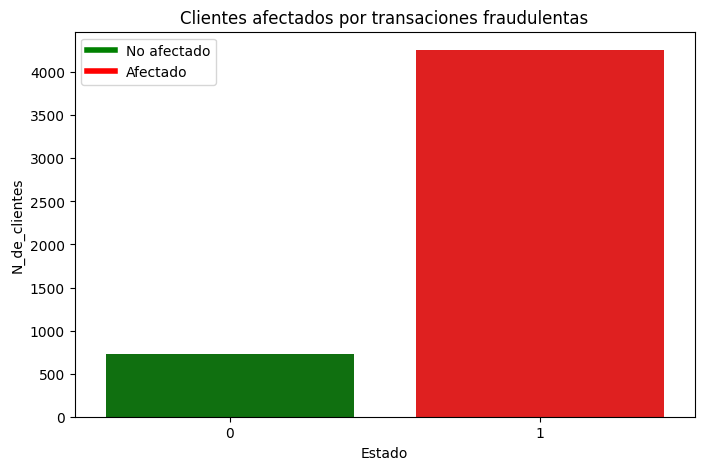

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=[0,1], y=[732,4258], palette=colors)
plt.title('Clientes afectados por transaciones fraudulentas')
custom_legend = [plt.Line2D([0], [0], color=sns.color_palette(colors)[0], lw=4),
                 plt.Line2D([0], [0], color=sns.color_palette(colors)[1], lw=4)]
plt.ylabel('N_de_clientes')
plt.xlabel('Estado')

# Mostrar la leyenda personalizada
ax.legend(custom_legend, ['No afectado', 'Afectado'])
plt.show()

##Clientes que no fueron afectados por transacciones fraudulentas
Aquí seguimos dándonos cuenta del panorama tan desolador; sin embargo, gracias a estos datos pude dar con algo que puede ser muy interesante y que de ser así es sospechoso, lo que creo que está sucediendo es que podría haber clientes en él datase que no tengan ni una sola transacción que no sea fraudulenta y esto lo sospeche debido a que hay 3 datos que faltaron al momento de buscar los clientes que no tuvieron transacciones fraudulentas, como dije al ser tantos datos es obvio que los clientes van a tener al menos una transacción fraudulenta y puede que varias más no por eso aparecen en los datos que no tuvieron transacciones fraudulentas como los que si, en fin lo que compete es que 3 clientes posiblemente no tengan ninguna transacción legal o que no sea fraudulenta y eso es preocupante, sin embargo vamos a resolver esta duda

In [ ]:
unique_customers_total = df['CUSTOMER_ID'].nunique()
print("Número total de clientes únicos en el conjunto de datos:", unique_customers_total)

Número total de clientes únicos en el conjunto de datos: 4990


In [ ]:
unique_customers_no_fraud = df[df['TX_FRAUD'] == 0]['CUSTOMER_ID'].nunique()
print("Número de clientes únicos que tuvieron transacciones sin fraude:", unique_customers_no_fraud)

Número de clientes únicos que tuvieron transacciones sin fraude: 4987


#Respuesta a nuestra duda
Tenemos los id de los clientes que no han tenido ninguna transaccion legitima o que por lo menos no se encuentran en los datos que no han tenido transacciones fraudulentas por lo cual sera una buena idea investigar mas a fondo estos datos.

In [ ]:
missing_no_fraud_clients = set(df['CUSTOMER_ID'].unique()) - set(df[df['TX_FRAUD'] == 0]['CUSTOMER_ID'].unique())
print("Clientes faltantes en la cuenta de los que no han sufrido fraude:", missing_no_fraud_clients)

Clientes faltantes en la cuenta de los que no han sufrido fraude: {4875, 4892, 1942}


In [ ]:
df[df['CUSTOMER_ID'].isin(missing_no_fraud_clients)]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
27237,27237,2023-01-03 17:12:00,4875,7701,1264.93,234720,2,1,1
311486,311486,2023-02-02 11:08:55,1942,4973,1359.97,2804935,32,1,1
500782,500782,2023-02-22 06:28:12,4875,7291,1207.43,4516092,52,1,1
749591,749591,2023-03-20 06:44:27,4892,9205,1372.94,6763467,78,1,1
1121981,1121981,2023-04-28 01:59:40,4892,9474,1004.29,10115980,117,1,1


##Número de terminales
Es el número de terminales que operan y se incluyenron dentro de el dataset y como vemos tampoco es un numero muy elevado, sin embargo vamos a revisar en que teminal se han generado más fraudes

In [ ]:
df['TERMINAL_ID'].nunique()

10000

##Todas las terminales sufrieron fraude al menos una vez
Esto es preocupante ya que quiere decir que este puede ser un desencadenante de que una transacion pueda ser tratada o no como fraudulenta ademas, amerita un serio problema de clasificacion de transacciones o en el peor caso de segiridad de las teminales lo cual puede generar desconfianza de las terminales y en general de los clientes.

In [ ]:
unique_terminals_no_fraud = df[df['TX_FRAUD'] == 0]['TERMINAL_ID'].nunique()
print("Número de terminales únicas que tuvieron transacciones sin fraude:", unique_terminals_no_fraud)

Número de terminales únicas que tuvieron transacciones sin fraude: 10000


In [ ]:
unique_terminals_fraud = df[df['TX_FRAUD'] == 1]['TERMINAL_ID'].nunique()
print("Número de terminales únicas que tuvieron transacciones con fraude:", unique_terminals_fraud)

Número de terminales únicas que tuvieron transacciones con fraude: 10000


Text(0.5, 1.0, 'Terminales que han sufrido fraude')

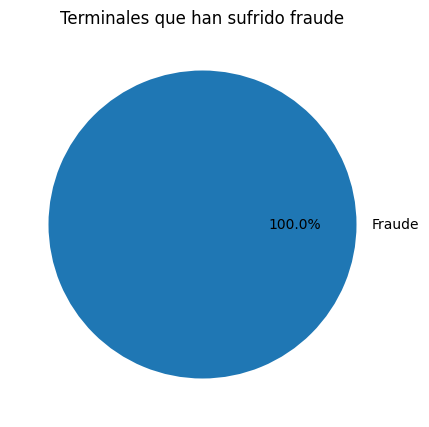

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie([100], labels=['Fraude'], autopct='%1.1f%%', startangle=180)
plt.title('Terminales que han sufrido fraude')

##Tipos de escenarios que ocurrienron al cometer fraude
En esta columna encontramos 4 tipos de escenarios donde no tenemos mucha documentación al respecto de esto, lo cual puede ser inconveniente para nosotros ya que no nos esta comunicando mucho en este caso.sin embargo no es obligatorio borrarla ya que esta columna puede ser muy valiosa con algun buen enfoque sin embargo solo decido no indagar más en este caso.

In [ ]:
df['TX_FRAUD_SCENARIO'].nunique()

4

In [ ]:
df['TX_FRAUD_SCENARIO'].value_counts()

0    1518186
1     222261
2       9077
3       4631
Name: TX_FRAUD_SCENARIO, dtype: int64

In [ ]:
dfm = df.drop(columns=['TRANSACTION_ID', 'TX_FRAUD_SCENARIO'])

In [ ]:
dfm

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
0,2023-01-01 00:00:31,596,3156,533.07,31,0,0
1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0
2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1
3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0
4,2023-01-01 00:10:34,927,9906,490.66,634,0,0
...,...,...,...,...,...,...,...
1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0
1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0
1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0
1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0


##Cantidad de dinero por cada transacción
Esta caracteristica me interesaba bastante ya que es la que más nos comunicara en el dataset, ya que como hemos visto tienden a ser altos los montos en las transacciones fraudulentas lo cual puede no ser lo más optimo, si no lo más preocupante, sin embargo vamos a ver con que panorama nos encontramos.


###Media de dinero que salio a base de una transacción:
Estos datos nos indican que la media de dindero que sacaron a base de una transacción fraudulenta es `3 veces` más alta que  la media de dinero que sacaron de una transacción no fraudulenta, lo que confirma nuestra sospecha de que las transacciones fraudulentas tienden a sacar un monto de dinero bastante elevado.

In [ ]:
#media de dinero que sacaron a base de una transaccion fraudulenta
dfm[dfm['TX_FRAUD']==1]['TX_AMOUNT'].mean()

1477.5603430111582

In [ ]:
##media de dinero que sacaron a base de una transaccion no fraudulenta
dfm[dfm['TX_FRAUD']==0]['TX_AMOUNT'].mean()

393.90920306207556

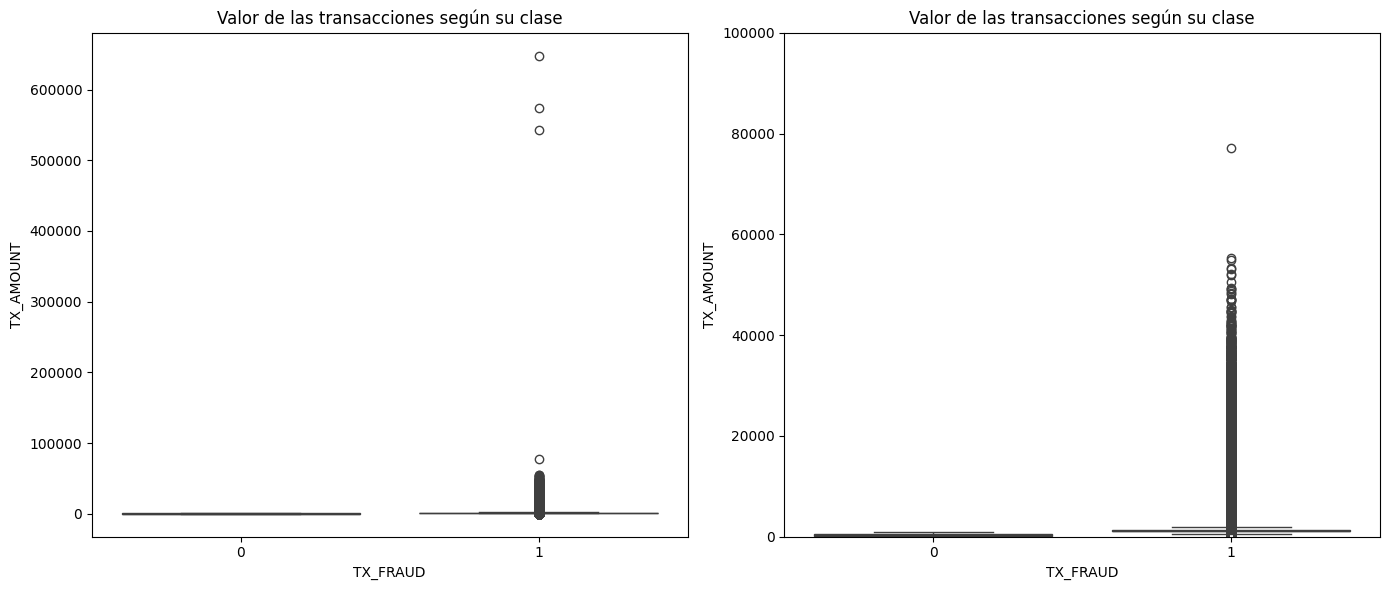

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=dfm, ax=ax1)
ax1.set_title('Valor de las transacciones según su clase')


sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=dfm, ax=ax2)
plt.ylim(0, 100000)
ax2.set_title('Valor de las transacciones según su clase')

plt.tight_layout()
plt.show()

In [ ]:
dfm.sort_values(by='TX_AMOUNT').tail(4)

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
402274,2023-02-11 18:54:15,3013,1585,77212.50,3610455,41,1
1744077,2023-07-01 20:45:26,1843,505,542956.25,15713126,181,1
1695822,2023-06-26 18:29:59,3280,6934,573218.75,15272999,176,1
1729033,2023-06-30 10:12:14,1843,4816,647837.50,15588734,180,1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
dfm[dfm['TX_FRAUD']==1]['TX_AMOUNT'].describe()

count   235969.000000
mean      1477.560343
std       2973.502497
min          0.200000
25%       1085.040000
50%       1212.470000
75%       1410.640000
max     647837.500000
Name: TX_AMOUNT, dtype: float64

In [ ]:
dfm[dfm['TX_FRAUD']==0]['TX_AMOUNT'].describe()

count   1518186.000000
mean        393.909203
std         275.344674
min           0.000000
25%         153.010000
50%         353.300000
75%         605.400000
max        1000.000000
Name: TX_AMOUNT, dtype: float64